<a href="https://colab.research.google.com/github/ttjh1234/Study_MLDL/blob/main/chapter06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#비지도 학습

타깃이 없는 데이터를 사용하는 비지도 학습을 공부한다.

대표적인 군집 알고리즘인 KMeans 알고리즘을 알아보고,

차원 축소 알고리즘인 PCA를 학습한다.

비지도 학습에서 사용할 데이터는 과일 사진 데이터이며,

캐글에 공개된 데이터 셋이다.
*   https://www.kaggle.com/moltean/fruits



##군집알고리즘

데이터는 https://bit.ly/fruits_300 를 사용한다.

데이터를 일단 구글 코랩에서 다운로드를 사용하겠다.

코랩의 코드 셀에서 '!' 문자로 시작하면 리눅스 쉘 명령으로 이해한다.

wget명령은 원격 주소에서 데이터를 다운로드하여 저장하며,

-O 옵션에서 저장할 파일 이름을 지정 할 수 있다.

In [1]:
!wget https://bit.ly/fruits_300 -O fruits_300.npy

--2021-02-01 16:32:25--  https://bit.ly/fruits_300
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy [following]
--2021-02-01 16:32:25--  https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy [following]
--2021-02-01 16:32:25--  https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... con

### 데이터 준비

위에서 저장한 npy 파일은 numpy의 **load()** 를 이용하여 불러온다.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

fruits=np.load('fruits_300.npy')

In [3]:
print(fruits.shape)

(300, 100, 100)


fruits 데이터는 총 300개의 샘플이 있고, 두 번째 차원은 이미지 높이, 

세번째 차원은 이미지 너비로, 이미지 크기는 100*100 이다.

각 픽셀은 넘파이 배열의 원소 하나에 대응한다.

In [4]:
print(fruits[0,0,:])

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


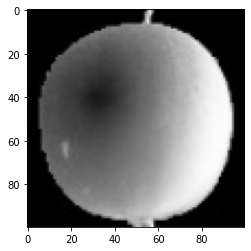

In [5]:
plt.imshow(fruits[0],cmap='gray')
plt.show()

위에서 출력한 그림처럼 첫 번째 행이 위에서 출력한 배열 값에 해당한다.

0에 가까울수록 검게, 높은 값은 밝게 표시된다.

이 흑백 이미지는 사진으로 찍은 이미지를 넘파이 배열로 변환할 때 반전시킨 것이다.

cmap 매개변수를 **'gray_r'** 로 지정하면 다시 반전하여 보여준다.

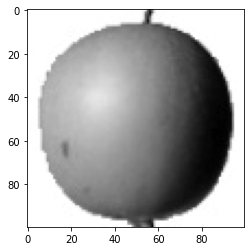

In [6]:
plt.imshow(fruits[0],cmap='gray_r')
plt.show()

matplotlib의 **subplots()** 함수를 사용하면 여러 개의 그래프를 배열처럼 표현 할 수있다.

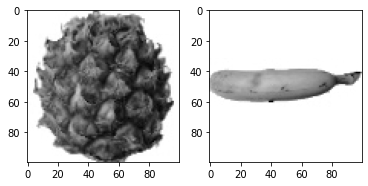

In [7]:
fig, ax=plt.subplots(1,2)
ax[0].imshow(fruits[100],cmap='gray_r')
ax[1].imshow(fruits[200],cmap='gray_r')
plt.show()

### 픽셀값 분석

이 학습용 샘플 데이터는 처음 100개는 사과, 그다음 100개는 파인애플,

마지막 100개는 바나나로 구성되어있다.

각 과일 사진의 평균을 내서 차이를 확인해보겠다.

사용하기 쉽게 fruits 데이터를 사과, 파인애플, 바나나 배열로 나누고, 100*100 이미지를 

펼쳐서 길이가 10000인 1차원 배열로 만들겠다.

In [8]:
apple=fruits[0:100].reshape(-1,100*100)
pineapple=fruits[100:200].reshape(-1,100*100)
banana=fruits[200:300].reshape(-1,100*100)

print(apple.shape)
print(fruits[0,1,:],'\n')
print(apple[0,100:200])



(100, 10000)
[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   2   2   1   1   1   1
   2   4   3   1   2   1   1   1   1   1   2   2   3   1   2   2   3  24
 112 163 229 132  30   1   4   2   2   2   3   2   1   1   3   1   2   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1] 

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   2   2   1   1   1   1
   2   4   3   1   2   1   1   1   1   1   2   2   3   1   2   2   3  24
 112 163 229 132  30   1   4   2   2   2   3   2   1   1   3   1   2   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


In [9]:
print(apple.mean(axis=1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


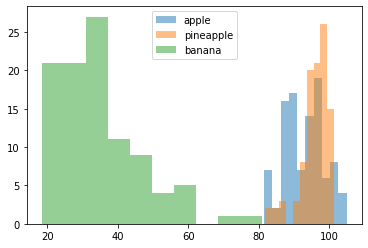

In [10]:
plt.hist(np.mean(apple,axis=1),alpha=0.5)
plt.hist(np.mean(pineapple,axis=1),alpha=0.5)
plt.hist(np.mean(banana,axis=1),alpha=0.5)
plt.legend(['apple','pineapple','banana'])
plt.show()

위의 히스토그램을 보면 바나나 사진의 평균값은 40 아래에, 사과와 파인애플은 90~100 사이에 많이 있다.

바나나는 픽셀 평균값으로 사과, 파인애플과 구분이 가능할 것 같다.

하지만 사과와 파인애플은 많이 겹쳐있어서 샘플의 평균값으로는 구분이 어려울 것 같다.

이번에는 픽셀별 평균값을 구하여 막대그래프를 그려 보겠다.

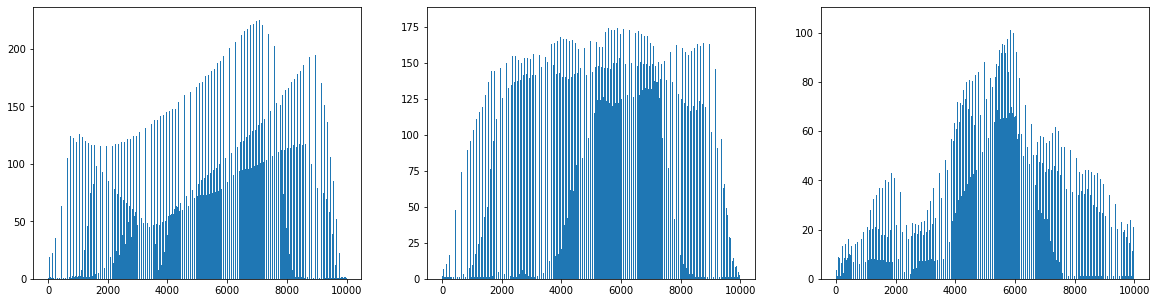

In [11]:
fig, ax=plt.subplots(1,3,figsize=(20,5))
ax[0].bar(range(10000),np.mean(apple,axis=0))
ax[1].bar(range(10000),np.mean(pineapple,axis=0))
ax[2].bar(range(10000),np.mean(banana,axis=0))
plt.show()

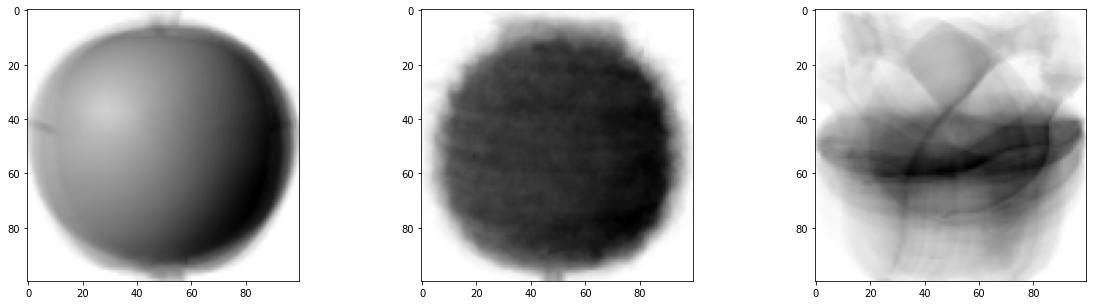

In [12]:
apple_mean=np.mean(apple,axis=0).reshape(100,100)
pineapple_mean=np.mean(pineapple,axis=0).reshape(100,100)
banana_mean=np.mean(banana,axis=0).reshape(100,100)
fig,ax=plt.subplots(1,3,figsize=(20,5))
ax[0].imshow(apple_mean,cmap='gray_r')
ax[1].imshow(pineapple_mean,cmap='gray_r')
ax[2].imshow(banana_mean,cmap='gray_r')
plt.show()

### 평균값과 가까운 사진 고르기

사과 사진의 평균값이 apple_mean과 가장 가까운 사진을 골라보겠다.

fruits 배열에 있는 모든 샘플에서 apple_mean을 뺀 절댓값 평균을 계산한다.



In [13]:
abs_diff=np.abs(fruits-apple_mean)
print(abs_diff.shape)

(300, 100, 100)


우리가 알아볼 것은 각 샘플에 대한 apple_mean 과의 차이 평균이기 때문에,

axis 차원에 1,2 를 지정해주어 샘플 별 평균을 구한다.

In [14]:
abs_mean=np.mean(abs_diff,axis=(1,2))
print(abs_mean.shape)

(300,)


그 후, apple_mean과의 차이가 가장 작은 100개의 인덱스를 가져온다.

numpy의 **argsort()**를 사용하여 작은 것부터 큰 순서대로 정렬을 한다.

그 후 subplot의 개수를 10*10으로 만들고, 반복문을 사용하여 출력을 한다.

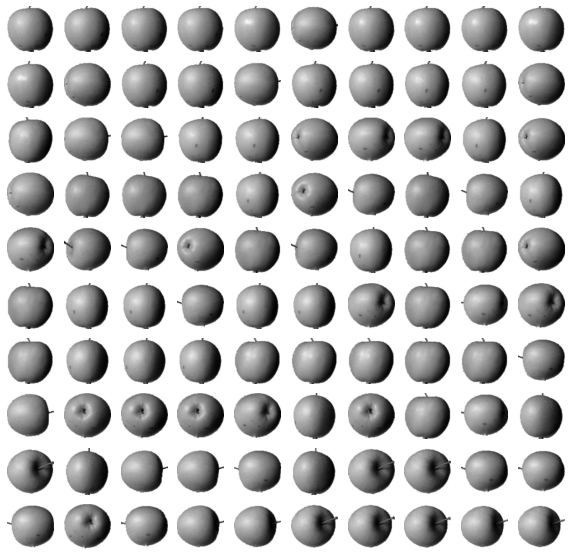

In [15]:
apple_index=np.argsort(abs_mean)[:100]
fig,ax=plt.subplots(10,10,figsize=(10,10))
for i in range(10):
  for j in range(10):
    ax[i,j].imshow(fruits[apple_index[i*10+j]],cmap='gray_r')
    ax[i,j].axis('off')
plt.show()

흑백 사진에 있는 픽셀값을 사용해 과일 사진을 모으는 작업을 했다.

비슷한 샘플끼리 그룹으로 모으는 작업을 **군집** 이라고 하고, 

군집 알고리즘에서 만든 그룹을 **클러스터**라고 한다.

위에서 했던 작업은 타깃을 알고 있었기 때문에 사용할 수 있었지만, 

비지도학습에서는 타깃을 모르고 학습을 진행한다.

## K-평균 알고리즘

K-평균 군집 알고리즘은 평균값을 자동으로 찾아준다.

평균값은 클러스터의 중심에 위치하기 때문에, 

**클러스터 중심(cluster center)** 또는 **센트로이드(centroid)**라고 부른다. 

**K-평균 알고리즘의 작동 방식**

1. 무작위로 K개의 클러스터 중심을 정한다.
2. 각 샘플에서 가장 가까운 클러스터 중심을 찾아 해당 클러스터의 샘플로 지정한다.
3. 클러스터에 속한 샘플의 평균값으로 클러스터 중심을 변경한다.
4. 클러스터 중심에 변화가 없을 때 까지 2번으로 돌아가 반복한다.



### KMeans 클래스

데이터는 위에서 사용했던 fruits_300 데이터를 계속 사용하겠다.

k-평균 알고리즘은 **sklearn.cluster**의 **KMeans** 클래스에 구현되어 있다.

군집된 결과는 KMeans 클래스 객체의 labels_에 저장된다.

In [16]:
print(fruits.shape)

(300, 100, 100)


In [17]:
fruits_2d=fruits.reshape(-1,100*100)
print(fruits_2d.shape)

(300, 10000)


In [18]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3,random_state=42)
km.fit(fruits_2d)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [19]:
print(km.labels_)

[0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [20]:
print(np.unique(km.labels_,return_counts=True))

(array([0, 1, 2], dtype=int32), array([ 91,  98, 111]))


In [21]:
def draw_fruits(arr,ratio=1):
  n=len(arr)
  #n은 샘플의 개수
  rows=int(np.ceil(n/10))
  #한 줄에 10개씩 이미지를 그리고, 샘플 개수를 10으로 나누어 전체 행 개수 구함
  cols=n if rows <2 else 10
  #행이 1개이면 열은 샘플 수이며, 행이 1개가 아니면 열은 10개 고정
  fig,ax=plt.subplots(rows,cols,figsize=(cols*ratio,rows*ratio),squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i*10+j<n:
        ax[i,j].imshow(arr[10*i+j],cmap='gray_r')
      ax[i,j].axis('off')
  plt.show()

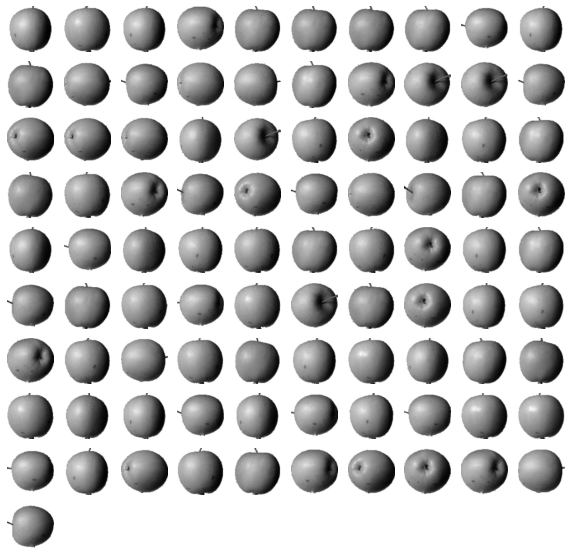

In [22]:
draw_fruits(fruits[km.labels_==0])

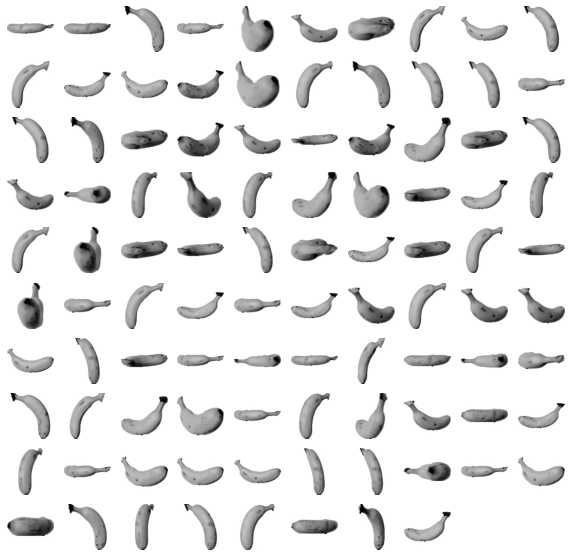

In [23]:
draw_fruits(fruits[km.labels_==1])

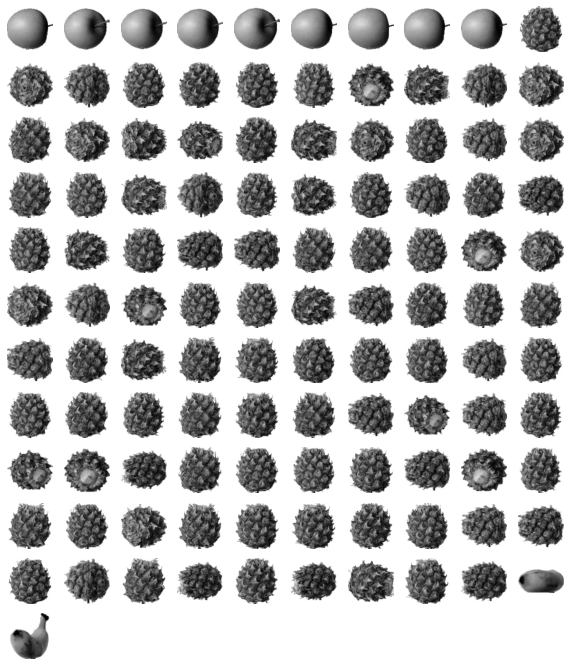

In [24]:
draw_fruits(fruits[km.labels_==2])

### 클러스터 중심

KMeans 클래스가 최종적으로 찾은 클러스터 중심은 **cluster_centers_** 속성에 저장되어 있다.

이 배열은 fruits_2d 샘플의 클러스터 중심이기 때문에 이미지로 출력하려면

다시 100*100으로 바꿔주어야 한다.


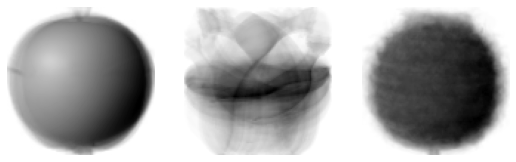

In [25]:
draw_fruits(km.cluster_centers_.reshape(-1,100,100),ratio=3)

KMeans 클래스는 훈련 데이터 샘플에서 클러스터 중심까지 거리로 변환해주는 **transform()**를 제공.

transform() 메서드를 적용하기에 앞서 전달되는 변수는 **2차원 배열**로 전달해야한다.

In [26]:
print(km.transform(fruits_2d[100:101]))

[[5267.70439881 8837.37750892 3393.8136117 ]]


인덱스가 100인 샘플의 각 클러스터 중심까지 거리를 보았을 때, 

세 번째 클러스터와의 거리가 3393.8로 제일 작다.

아마 인덱스가 100인 샘플은 3번째 클러스터(2)에 속할 것 같다.

KMeans 클래스는 가장 가까운 클러스터 중심을 예측 클래스로 출력하는 **predict()**를 제공.

In [27]:
print(km.predict(fruits_2d[100:101]))

[2]


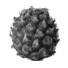

In [28]:
draw_fruits(fruits[100:101])

KMeans 알고리즘은 반복적으로 클러스터 중심을 옮기면서 최적의 클러스터를 찾는다.

KMeans 클래스의 **n_iter_** 속성에 알고리즘이 반복한 횟수가 저장된다.

In [29]:
print(km.n_iter_)

3


### 최적의 K 찾기

K-평균 알고리즘의 단점 중 하나는 클러스터 개수를 사전에 지정해야 한다.

군집 알고리즘에서 적절한 k 값을 찾기 위한 완벽한 방법은 없다.

몇 가지 도구가 있지만, 각자 장단점이 존재한다.

여기서는 적절한 클러스터 개수를 찾기 위한 대표적인 방법인 **엘보우(elbow)** 방법을 쓴다.

K-평균 알고리즘은 클러스터 중심과 클러스터에 속한 샘플 사이의 거리를 알 수 있다.

이 거리의 제곱합을 **이너셔(inertia)**라고 한다.

일반적으로 클러스터 개수가 늘어나면 클러스터 개개의 크기는 줄어들기 때문에, 이너셔도 줄어든다.

엘보우 방법은 클러스터 개수를 늘려가면서 이너셔의 변화를 관찰하여 최적의 개수를 찾는 방법.



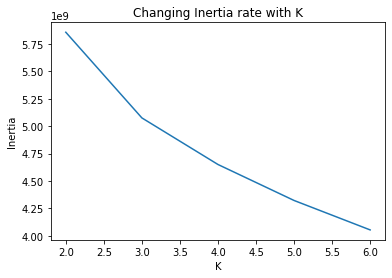

In [30]:
inertia=[]
for k in range(2,7):
  km=KMeans(n_clusters=k,random_state=42)
  km.fit(fruits_2d)
  inertia.append(km.inertia_)

plt.plot(range(2,7),inertia)
plt.title('Changing Inertia rate with K')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

클러스터 개수를 증가시키면서 이너셔를 그래프로 그리면 감소하는 속도가 꺾이는 지점이 있다.

이 지점부터는 클러스터 개수를 늘려도 클러스터에 잘 밀집된 정도가 크게 개선되지 않는다.

위 그래프에서는 꺾이는 지점이 뚜렷하지는 않지만, K=3에서 기울기가 작아졌다.

## 주성분 분석

앞서 보았던 이미지 데이터는 총 10000개라는 특성을 가지고 있다.

이는 데이터가 쌓이다보면 많은 양의 저장 공간을 쓰게 될 것인데, 

차원 축소를 통해 손실을 최소화하면서 효과적인 분석을 도와주는 **차원 축소** 알고리즘을 공부한다.

차원 축소는 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고, 

지도 학습 모델의 성능을 향상시킬 수 있는 방법이다.

여기에서는 대표적인 차원 축소 알고리즘인 **주성분 분석(Principal Component Analysis)**



**PCA**라고한다.

주성분 분석은 데이터에 있는 분산이 큰 방향을 찾는 것으로 이해할 수 있다.

주성분은 원본 차원과 같고, 주성분으로 바꾼 데이터는 차원이 줄어든다

주성분이 가장 분산이 큰 방향이기 때문에 주성분에 투영하여 바꾼 데이터는 

원본이 가지고 있는 특성을 가장 잘 나타낸다.

**기술적인 이유로 주성분은 원본 특성의 개수와 샘플 개수 중 작은 값만큼 찾을 수 있다. 일반적으로 비지도 학습은 대량의 데이터에서 수행하기 때문에 원본 특성의 개수만큼 찾을 수 있다.**

### PCA 클래스

데이터는 위에서 사용한 fruit_300 데이터를 계속 사용한다.

In [31]:
print(fruits.shape)
print(fruits_2d.shape)

(300, 100, 100)
(300, 10000)


**sklearn.decomposition** 모듈 아래 **PCA** 클래스로 주성분 분석 알고리즘을 사용할 수 있다.

PCA클래스의 객체를 만들 때 n_components 매개변수에 주성분의 개수를 지정해야 한다.

In [32]:
from sklearn.decomposition import PCA
pca=PCA(n_components=50)
pca.fit(fruits_2d)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

앞서 n_components 매개변수에 50을 넣어 50개의 주성분이 나온 것을 확인할 수 있다.

두번째 차원은 항상 원본 데이터의 특성 개수를 나타낸다.

In [33]:
print(pca.components_.shape)

(50, 10000)


이 주성분은 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것이다.

앞서 정의한 draw_fruits 함수를 사용하여 주성분을 그림으로 그려본다.

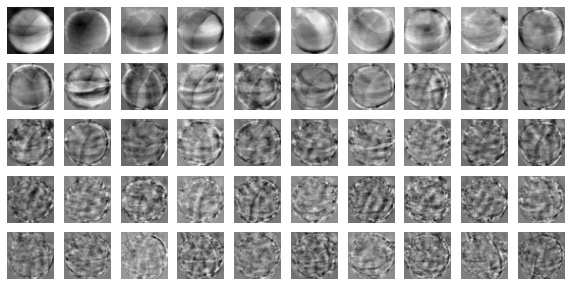

In [34]:
draw_fruits(pca.components_.reshape(-1,100,100))

주성분을 찾았으므로, 원본 데이터를 주성분에 투영하여 특성의 개수를 10000개에서 50개로 

줄일 수 있다.

PCA의 **transform()** 메서드를 이용해 차원을 축소한다.


In [35]:
print(fruits_2d.shape)
fruits_pca=pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 10000)
(300, 50)


### 원본 데이터 재구성

앞에서 10000개의 특성을 50개로 줄였다.

원래 특성이 가지는 분산에서 최대한 분산이 큰 방향으로 데이터를 투영했기 때문에,

원본 데이터를 상당 부분 재구성할 수 있다.

PCA 클래스는 **inverse_transform()** 메서드를 제공해서 다시 복원할 수 있다.

In [36]:
fruits_inverse=pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


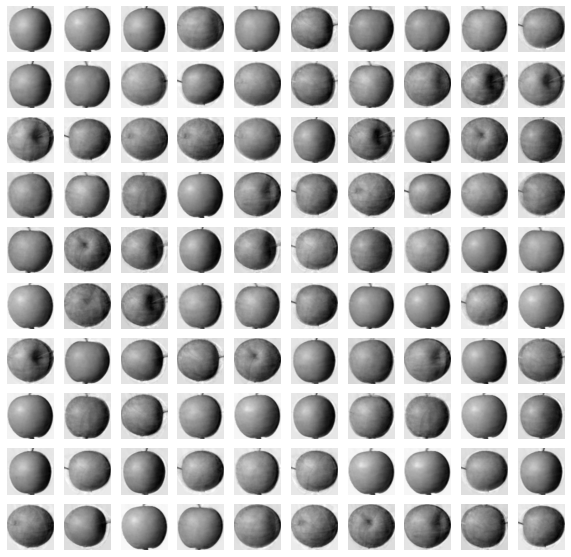

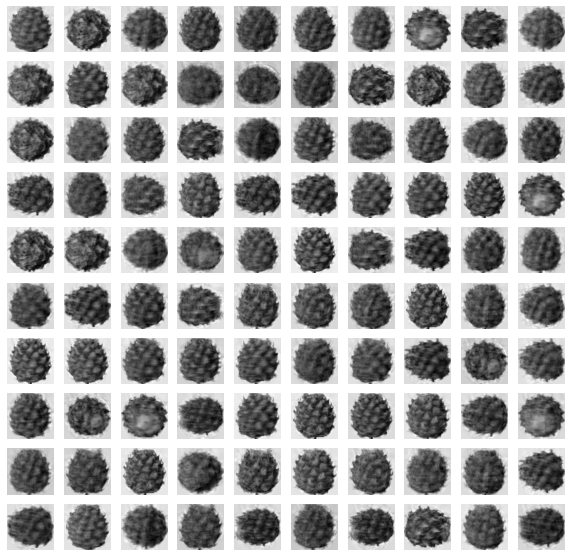

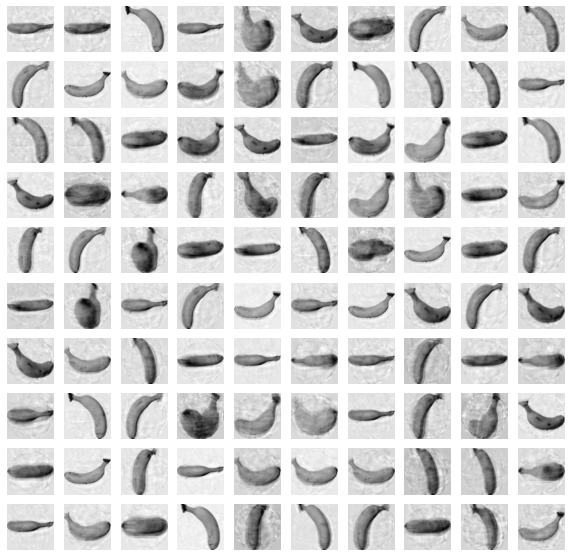

In [37]:
fruits_reconstruct=fruits_inverse.reshape(-1,100,100)
for i in [0,100,200]:
  draw_fruits(fruits_reconstruct[i:i+100])
  print('\n')

### 설명된 분산

주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값을 

**설명된 분산(explained variance)**이라고 한다.

PCA 클래스의 **explained_variance_ratio_**에 각 주성분의 설명된 분산 비율이 기록되어있다.


In [38]:
print(np.sum(pca.explained_variance_ratio_))

0.9215302480665197


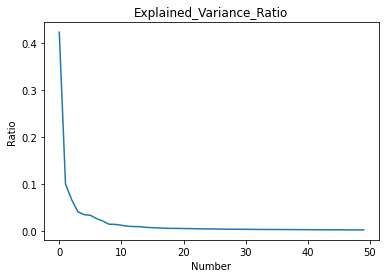

In [39]:
plt.plot(pca.explained_variance_ratio_)
plt.title('Explained_Variance_Ratio')
plt.xlabel('Number')
plt.ylabel('Ratio')
plt.show()

설명된 분산을 가지고 plot을 그려보면, 처음 10개의 주성분이 대부분의 분산을 표현하고 있다.

### 다양한 알고리즘에 접목

과일 사진 원본 데이터와 PCA로 축소한 데이터를 지도 학습에 적용해 보겠다.

3개의 타깃값을 가지는 분류이므로 로지스틱 회귀 모델을 먼저 사용하겠다.

In [40]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()

지도 학습을 하기 위해 타깃값을 만들어준다.

(**처음 100개 사과(0), 그 다음 100개 바나나(1),나머지 100개 파인애플(2)**) 

In [41]:
y=np.array([0]*100+[1]*100+[2]*100)

교차 검증을 통해 검증 점수와 훈련 시간의 평균을 출력한다.

첫 번째 원본 데이터에서는 0.9967의 점수와 1.48초가 걸렸다.

In [42]:
from sklearn.model_selection import cross_validate
scores=cross_validate(lr,fruits_2d,y)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.5841491222381592


두 번째 데이터에서는 1.0의 점수와 0.03초가 걸렸다.

In [43]:
scores=cross_validate(lr,fruits_pca,y)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.041686058044433594


PCA로 훈련 데이터의 차원을 축소하면 저장 공간뿐만 아니라 머신러닝 모델의 훈련 속도도 높일 수 있다.

앞서 PCA의 n_components 매개변수에 주성분의 개수를 지정했었는데,

원하는 설명된 분산의 비율을 입력할 수도 있다.

In [44]:
pca=PCA(n_components=0.5)
pca.fit(fruits_2d)
print(pca.n_components_)

2


위 데이터에서는 2개의 특성만으로 원본 데이터의 분산을 50% 표현할 수 있다.

주성분 분석을 이용해 데이터를 변환하고, 다시 교차 검증을 진행하겠다.

In [45]:
fruits_pca=pca.transform(fruits_2d)

In [46]:
print(fruits_pca.shape)

(300, 2)


In [47]:
scores=cross_validate(lr,fruits_pca,y)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.046732759475708006


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


교차 검증의 결과로 단 2개의 특성을 사용하여 0.99의 점수를 얻었다.

위의 경고는 로지스틱 회귀 모델이 완전히 수렴하지 못했으니 반복 회수를 증가하라는 경고인데, 

교차검증의 결과가 충분히 좋기 때문에 무시하겠다.

다음에는 PCA를 이용하여 KMeans 알고리즘을 적용시키겠다.

In [48]:
km=KMeans(n_clusters=3,random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_,return_counts=True))

(array([0, 1, 2], dtype=int32), array([ 91,  99, 110]))


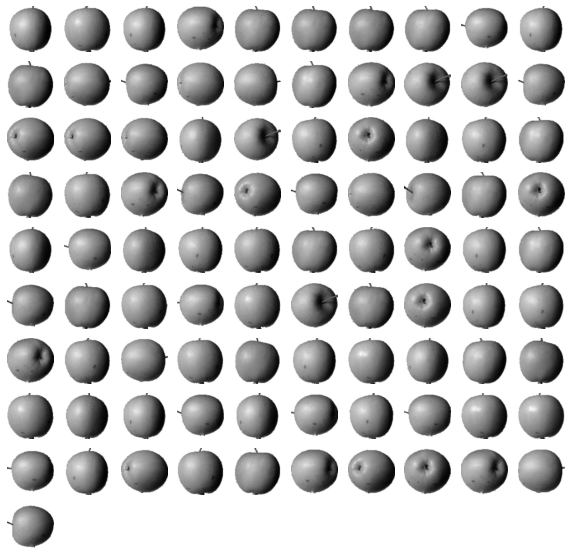

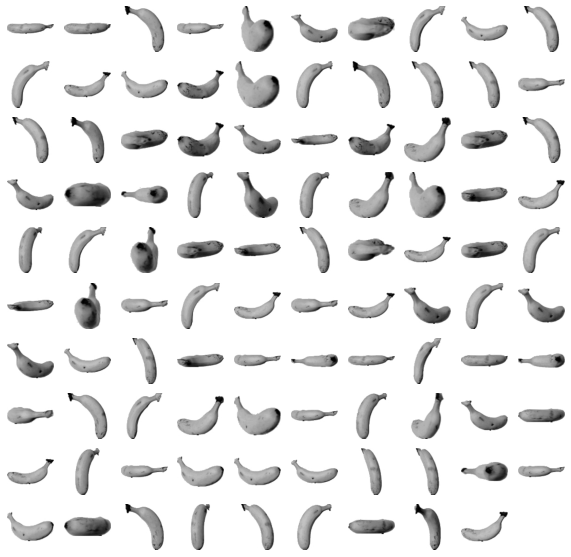

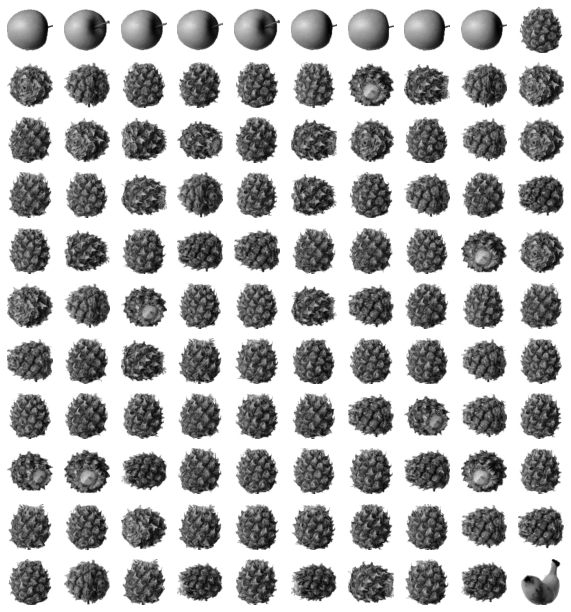

In [49]:
for y in range(0,3):
  draw_fruits(fruits[km.labels_==y])
  print('\n')

앞서 PCA를 수행하지 않은 KMeans와 거의 비슷한 결과를 나타내고 있다.

차원 축소를 하면 학습 속도를 단축시키며, 저장 공간을 줄일 수 있으면서, 시각화의 장점이 있다.



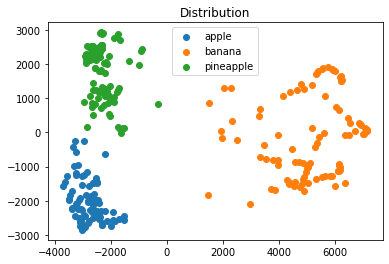

In [50]:
for y in range(0,3):
  data=fruits_pca[km.labels_==y]
  plt.scatter(data[:,0],data[:,1])
plt.legend(['apple','banana','pineapple'])
plt.title('Distribution')
plt.show()

각 클러스터의 산점도를 2개의 특성만을 사용하여 나타냈는데 잘 분리가 되었다.

아직 사과와 파인애플의 경계가 붙어있어 아직 몇몇의 샘플이 혼동이 있다.

차원축소를 이용하여 데이터를 시각화하여 생각 못한 인사이트를 얻을 수 있다.